# Multi Linear Regression assignment

# 2. 50_startups

Problem:
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

First we'll import all the required libaries, which includes pandas, numpy, matplotlib and seaborn. Then we'll set %matplotlib inline and we'll import rest of the sklearn stuff later

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now we will fetch the data from the csv file and check information and description of the data.

In [2]:
d50start = pd.read_csv('50_Startups.csv')

In [3]:
d50start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
d50start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
d50start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Exploratory Data Analysis
Let's explore the data

In [6]:
sns.set_style('whitegrid')

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


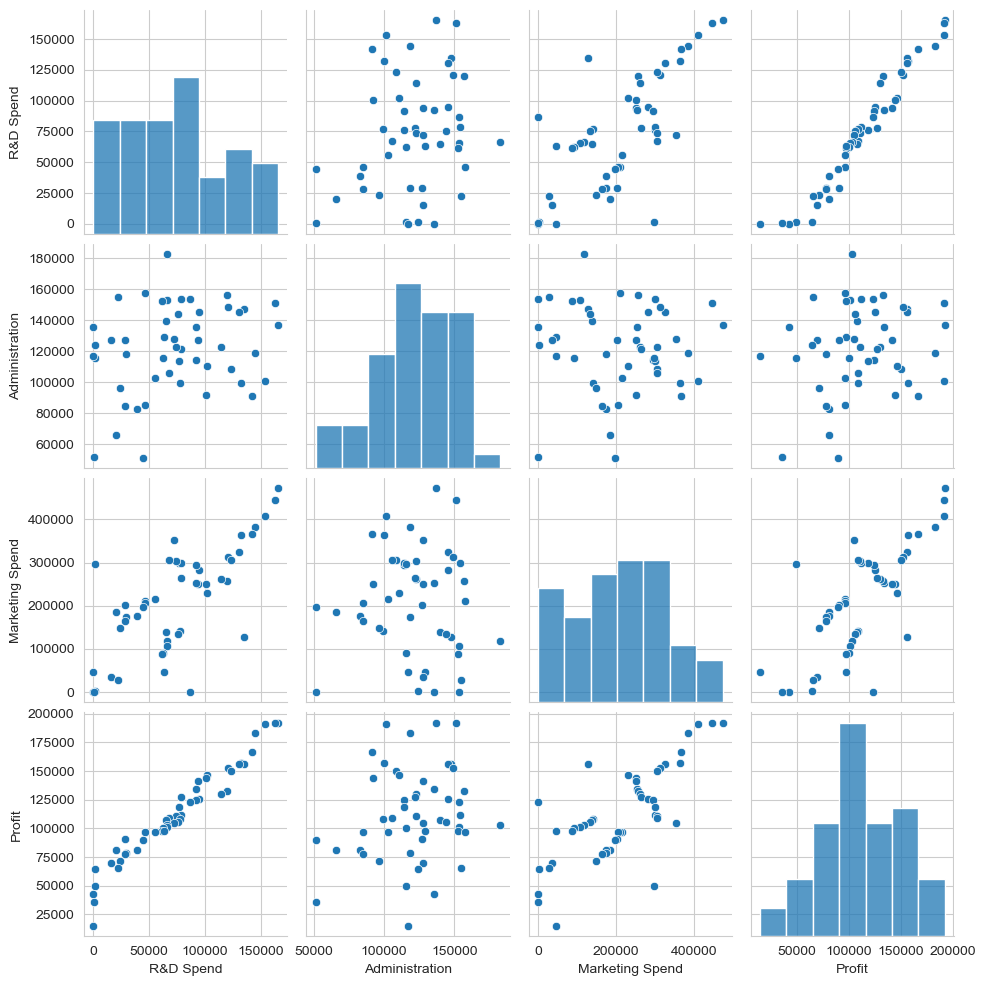

In [7]:
sns.pairplot(d50start)

<Axes: >

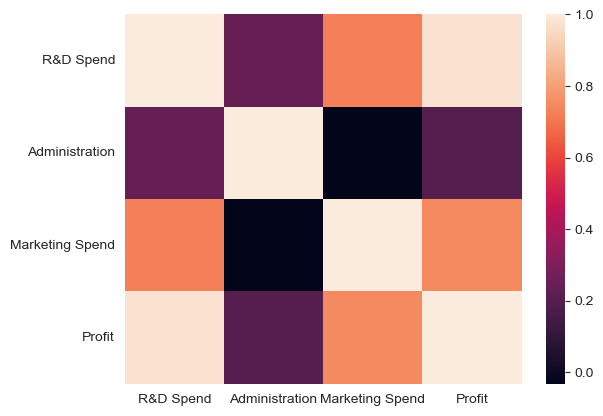

In [8]:
sns.heatmap(d50start.corr(numeric_only = True))

In [10]:
d50start.corr(numeric_only = True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


From here, we can see that profit is much closely related to R&D Spend, and moderately related to Marketing Spend and very less related to Administration. 

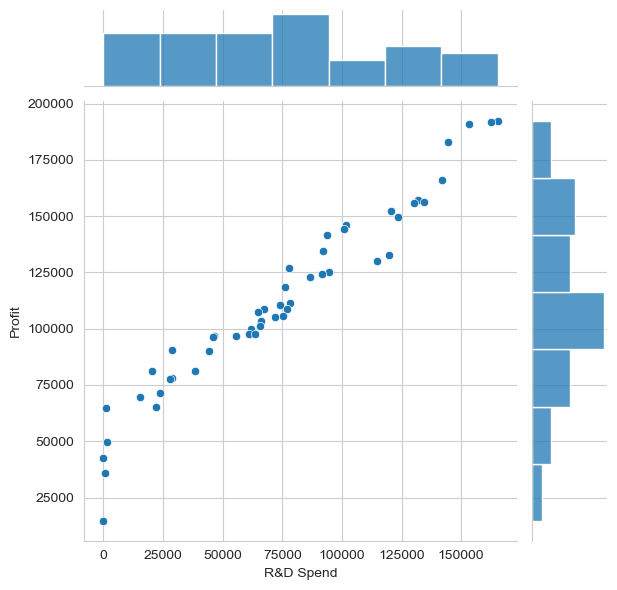

In [12]:
sns.jointplot(x = 'R&D Spend', y = 'Profit', data = d50start)

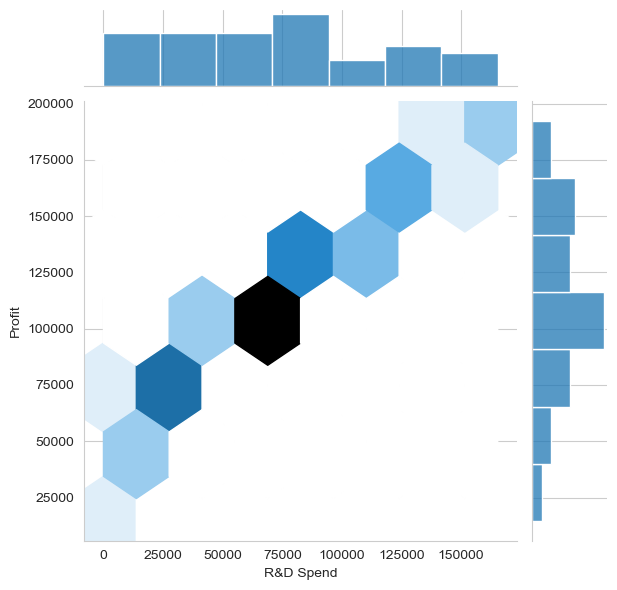

In [13]:
sns.jointplot(x = 'R&D Spend', y = 'Profit', kind = 'hex', data = d50start)

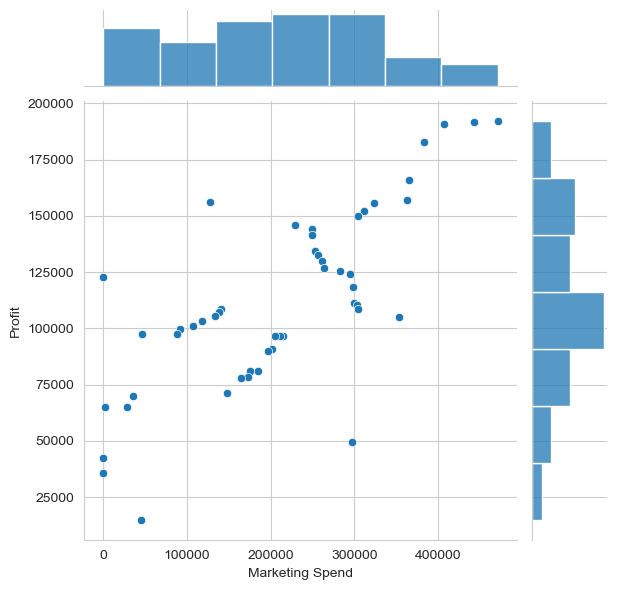

In [14]:
sns.jointplot(x = 'Marketing Spend', y = 'Profit', data = d50start)

Here, we have a better picture of how variables are related to each other. 

Now, let us see how our data is distributed.

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


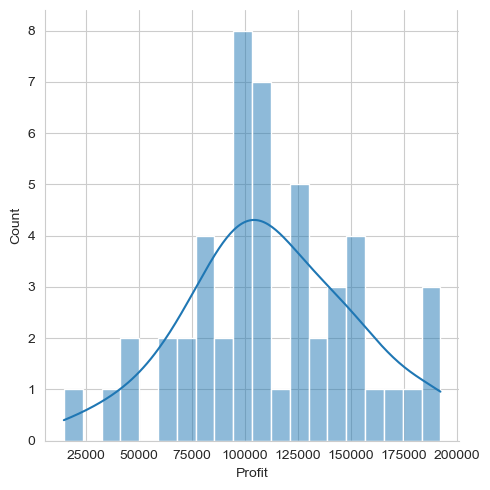

In [15]:
sns.displot(d50start['Profit'], bins = 20, kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2ddef7a9750>,
 'caps': [<matplotlib.lines.Line2D at 0x2ddf342f190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ddf342d150>],
 'medians': [<matplotlib.lines.Line2D at 0x2ddf341fa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ddeff26690>],
 'means': []}

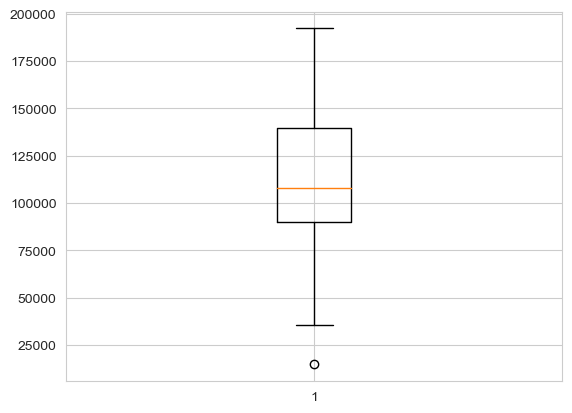

In [17]:
plt.boxplot(d50start['Profit'])

<Axes: >

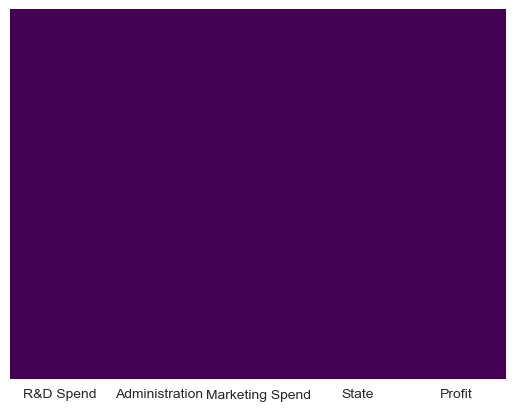

In [18]:
sns.heatmap(d50start.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [19]:
d50start.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There is no missing value in the data. So, we are ready to go!

# Now, we'll create our model

Before that we would set a variable X equal to the administration, marketing spend, and state. 


Here we know that State in not numerical, so let's first just try without it.

In [27]:
X = d50start[['Administration', 'Marketing Spend']]
y = d50start['Profit']

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Administration   50 non-null     float64
 1   Marketing Spend  50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [29]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: Profit
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 532.0 bytes


# Training and testing data

Now, we'll take our data and split it into two set, training and testing data.

We would use model_selection.train_test_split from sklearn to split the data into training and testing data. By default training set would have 75% data.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)

# Training the model
Now it is time to train our model on our training dataset. So, we'd import LinearRegression from sklearn.linear_model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
print('Coefficient: \n', lm.coef_)

Coefficient: 
 [0.35784463 0.26682386]


# Predicting test data

In [36]:
pred = lm.predict(X_test)

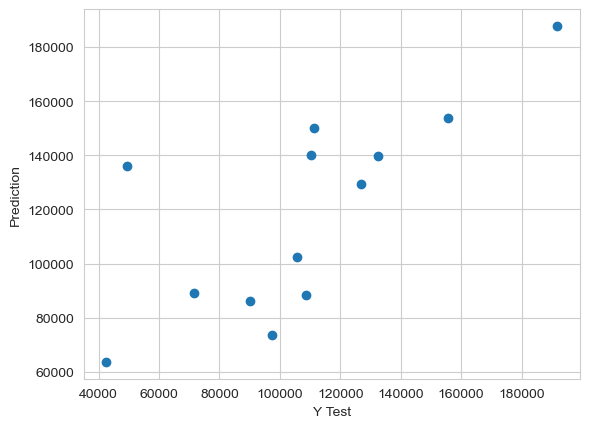

In [37]:
plt.scatter(y_test, pred)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

# Evaluation of the Model

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 20010.071820185807
MSE: 899747653.5234971
RMSE: 29995.79393054128


# Residuals

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


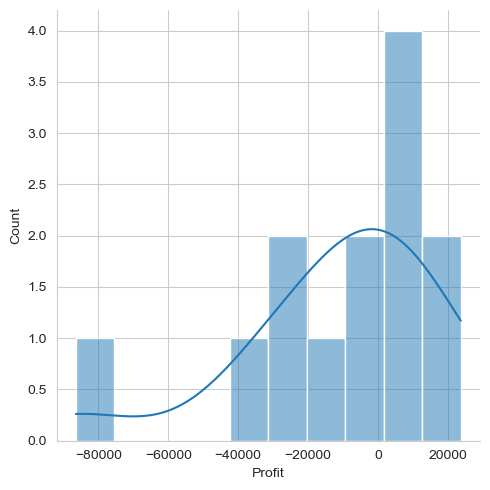

In [44]:
sns.displot((y_test - pred), bins = 10, kde = True);

# Conclusion

In [45]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Administration,0.357845
Marketing Spend,0.266824


In [46]:
lm.score(X_test, y_test)

0.40798442074771357

R2 score is very low for this model, so we'd try to improve it. 
So, now we'll bring the dummy variables in picture to account for the State feature which was missing from the model formation. 

# Model 2

In [49]:
dnew = d50start.copy()

In [51]:
dnew.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Transformation

Here, we'd create dummy variable

In [52]:
dnew_clean = pd.get_dummies(dnew, columns = ['State'])

In [53]:
dnew_clean.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


__Now we'll rebuild the model so that we could have another set of variable.__

In [55]:
dnew_clean.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [57]:
X1 = dnew_clean[['R&D Spend', 'Administration', 'Marketing Spend',
       'State_California', 'State_Florida', 'State_New York']]
y1 = dnew_clean['Profit']

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=102)

In [59]:
lm1 = LinearRegression().fit(X1_train, y1_train)

In [60]:
lm1

LinearRegression()

In [61]:
pred1 = lm1.predict(X1_test)

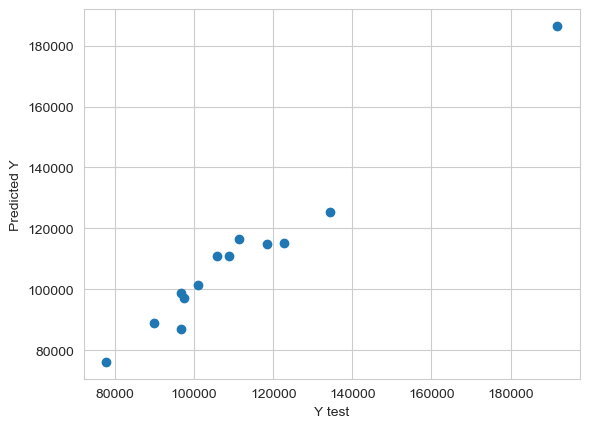

In [62]:
plt.scatter(y1_test, pred1)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

In [63]:
print('MAE:', metrics.mean_absolute_error(y1_test, pred1))
print('MSE:', metrics.mean_squared_error(y1_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, pred1)))

MAE: 4116.731957482494
MSE: 26528264.25071428
RMSE: 5150.559605587948


In [64]:
lm1.score(X1_test, y1_test)

0.9637936652489462

So, here the model accuracy is about 96%

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


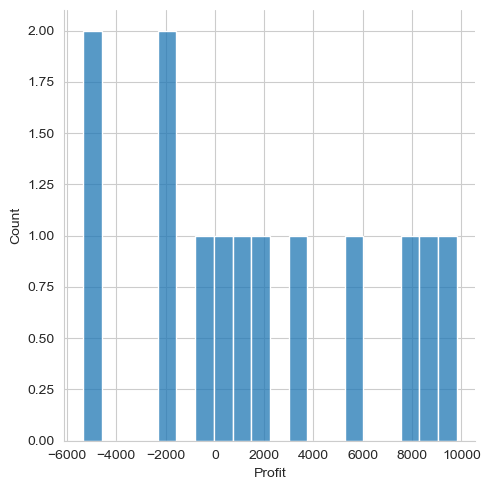

In [67]:
sns.displot((y1_test- pred1), bins = 20)

__Conclusion of the model just made:__

In [69]:
coeffecients = pd.DataFrame(lm1.coef_,X1.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
R&D Spend,0.801955
Administration,-0.038837
Marketing Spend,0.026445
State_California,-1363.372185
State_Florida,1136.951767
State_New York,226.420418


# Model 3

Now, let us try dropping the administration column

In [70]:
dnew_clean.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


In [71]:
X2 = dnew_clean[['R&D Spend','Marketing Spend',
       'State_California', 'State_Florida', 'State_New York']]
y2 = dnew_clean['Profit']

In [72]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=101)

In [73]:
lm2 = LinearRegression().fit(X2_train, y2_train)

In [74]:
pred2 = lm2.predict(X2_test)

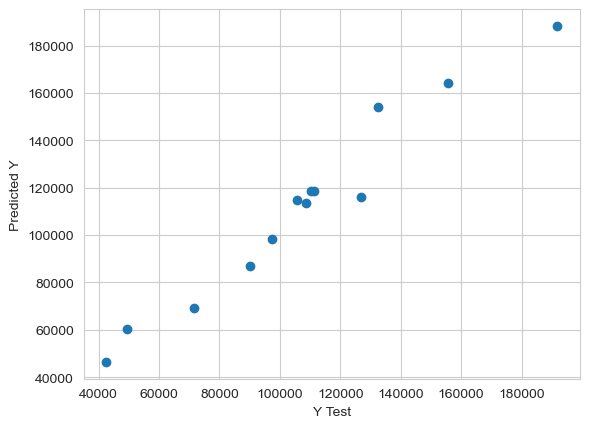

In [75]:
plt.scatter(y2_test, pred2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [76]:
print('MAE:', metrics.mean_absolute_error(y2_test, pred2))
print('MSE:', metrics.mean_squared_error(y2_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, pred2)))

MAE: 7289.429647586304
MSE: 79993170.58825313
RMSE: 8943.890126128179


In [77]:
lm2.score(X2_test, y2_test)

0.9473661275619043

Here, the model has R2 score of about 94.7%

# Final Conclusion

So, I'd pick model 2 out of all three model, because the R2 value for the model was highest, at 96%

# Alternate Model

In [47]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              507.4
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                    5.20e-33
Time:                        01:15:57   Log-Likelihood:                         -577.82
No. Observations:                  50   AIC:                                      1160.
Df Residuals:                      48   BIC:                                      1163.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Administration      0.4602      0.054      8.471      0.000       0.351       0.569
Marketing Spend     0.2621      0.028      9.432      0.000       0.206       0.318
==============================================================================
Omnibus:                        6.274   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.681
Skew:                          -0.547   Prob(JB):                       0.0584
Kurtosis:                       4.237   Cond. No.                         4.34
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""